In [53]:
import pandas as pd

# Load the DataFrame from the CSV file
df = pd.read_csv('2011_2024.csv')

# Drop rows with NaN values in either 'latitude' or 'longitude' column
df = df.dropna(subset=['latitude', 'longitude'])

# Assuming 'column_name' is the name of the column you want to check
nan_count_column = df['longitude'].isna().sum()

# Display the number of NaN values in the specified column
print(nan_count_column)

0


/var/folders/mf/txv8p7fx2yz68v4bx9pfbxf80000gn/T/ipykernel_4660/1744189179.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2011_2024.csv')


In [74]:

df.columns

Index(['_id', 'case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt',
       'on_time', 'case_status', 'closure_reason', 'case_title', 'subject',
       'reason', 'type', 'queue', 'department', 'submitted_photo',
       'closed_photo', 'location', 'fire_district', 'pwd_district',
       'city_council_district', 'police_district', 'neighborhood',
       'neighborhood_services_district', 'ward', 'precinct',
       'location_street_name', 'location_zipcode', 'latitude', 'longitude',
       'geom_4326', 'source', 'cluster'],
      dtype='object')

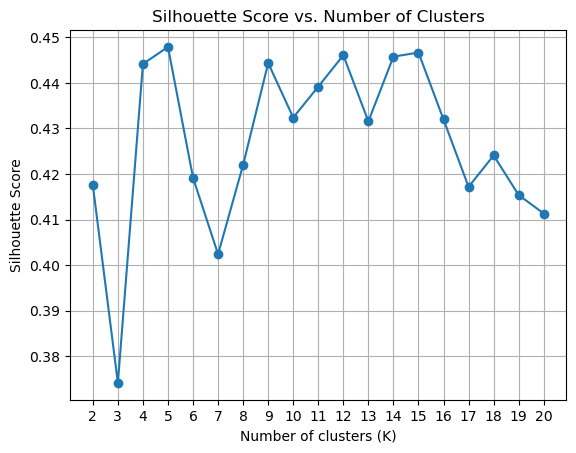

In [60]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns


# Subset of your data (for testing purposes)
subset_df = df.sample(n=1000, random_state=42)  # Adjust the size of the subset as needed

# Define the range of K values to search over
k_values = range(2, 21)  # You can adjust these values based on your data and desired number of clusters

# Perform K-means clustering for each K value and record the silhouette score
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(subset_df[['latitude', 'longitude']])
    silhouette_scor = silhouette_score(subset_df[['latitude', 'longitude']], clusters)
    silhouette_scores.append(silhouette_scor)

# Plot the silhouette scores for different K values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Load the DataFrame from the CSV file
df = pd.read_csv('your_data.csv')

# Subset of your data (for testing purposes)
subset_df = df.sample(n=1000, random_state=42)  # Adjust the size of the subset as needed

# Define the range of parameter values to search over
eps_values = [0.01, 0.05, 0.1, 0.2, 0.5]  # You can adjust these values based on your data
min_samples_values = [5, 10, 20, 30]  # You can adjust these values based on your data

# Perform grid search
best_eps = None
best_min_samples = None
best_num_clusters = float('inf')

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(subset_df[['latitude', 'longitude']])
        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Count clusters excluding noise
        if num_clusters > 0 and abs(num_clusters - 10) < abs(best_num_clusters - 10):
            best_eps = eps
            best_min_samples = min_samples
            best_num_clusters = num_clusters

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best num_clusters: {best_num_clusters}")


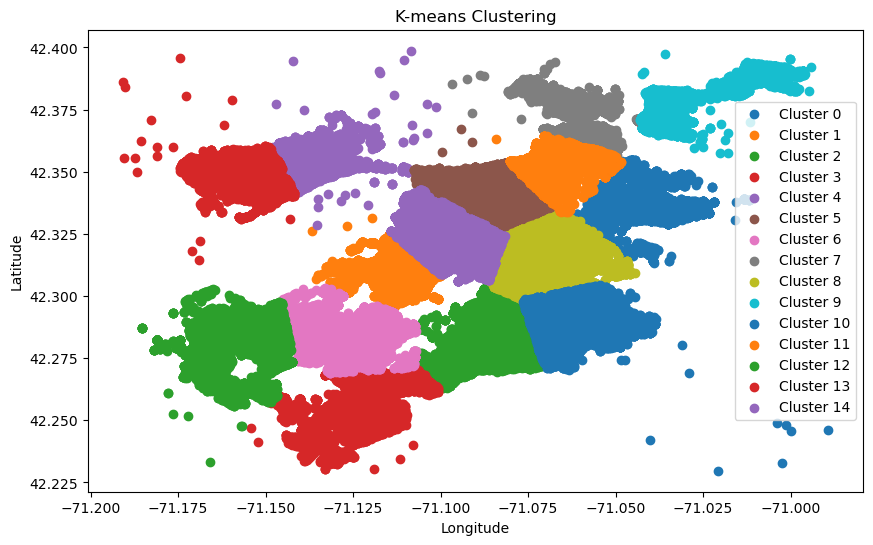

In [61]:
# Define the number of clusters
num_clusters = 15

# Perform K-means clustering with 15 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df[['latitude', 'longitude']])

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_label}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
plt.legend()
plt.show()

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.mixture import GaussianMixture


# Create a directory to store the cluster plots
output_dir = 'zipclusters'
os.makedirs(output_dir, exist_ok=True)

# Get unique zipcodes and their counts
zipcode_counts = df['location_zipcode'].value_counts()

# Define the minimum number of samples required for clustering
min_samples = 15

# Define the number of clusters
num_clusters = 15  # You can adjust this value as needed

# Loop over each unique zipcode
for zipcode, count in zipcode_counts.items():
    if count > min_samples:
        # Subset data for the current zipcode
        zipcode_data = df[df['location_zipcode'] == zipcode]
        
        # Fit Gaussian Mixture Model to the data
        gmm = GaussianMixture(n_components=num_clusters, random_state=42)
        gmm.fit(zipcode_data[['latitude', 'longitude']])
        
        # Predict the likelihood of each point belonging to a cluster
        probabilities = gmm.predict_proba(zipcode_data[['latitude', 'longitude']])
        

       # Visualize the clusters
        plt.figure(figsize=(10, 6))
        for cluster_label in range(num_clusters):
            plt.scatter(zipcode_data['longitude'], zipcode_data['latitude'], c=probabilities[:, cluster_label], cmap='viridis', alpha=0.7)
        plt.colorbar(label='Probability')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(f'GMM Clustering for Zipcode {zipcode}')
        
        # Save the plot as an image in the output directory
        output_filename = os.path.join(output_dir, f'zipcode_{zipcode}_clusters.png')
        plt.savefig(output_filename)
        plt.close()


print("Cluster plots saved in 'zipclusters' folder.")


Cluster plots saved in 'zipclusters' folder.
